In [7]:
import tensorflow as tf 
import keras 
import matplotlib.pyplot as plt
import numpy as np


In [8]:
# lets define an array 
X = np.arange(-100, 100,4)
X


array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [9]:
# lets define a function y which takes X and adds 10 to it 
y = X + 10   
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [10]:
# now we want to split the data into 2 sets 
# training and test data 

len(X)

# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)


(40, 10)

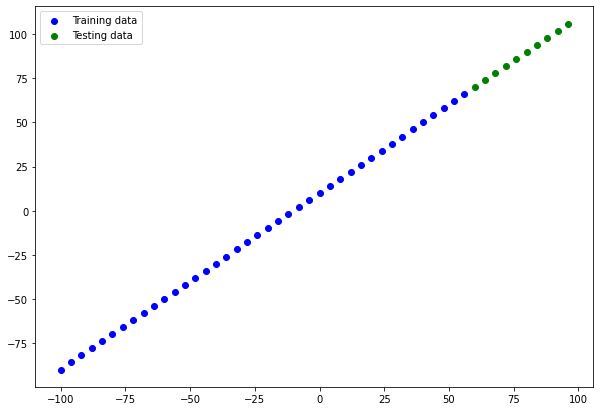

In [11]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [41]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
with tf.device('/cpu:0'):model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name = "input_layer"), 
  tf.keras.layers.Dense(1, name= "output_layers")
], name = "model1")

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae, # since loss and metrics are the smae we are going to retunr the loss as evaluate 
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])



In [43]:
model.fit(X_train, y_train, epochs=100, verbose=0) # verbose controls how much gets output


2022-06-30 19:45:58.911949: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [44]:
# This will work after specifying the input shape
model.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layers (Dense)       (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


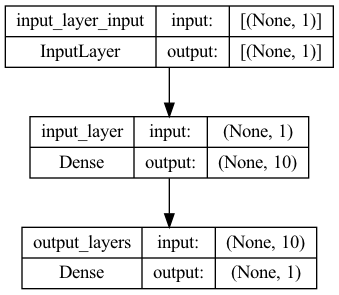

In [45]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [46]:

y_preds = model.predict(X_test)
# View the predictions
y_preds


1/1 [==============================] - 0s 13ms/step


array([[ 70.55219 ],
       [ 75.139915],
       [ 79.72764 ],
       [ 84.31536 ],
       [ 88.90309 ],
       [ 93.49081 ],
       [ 98.07854 ],
       [102.66627 ],
       [107.25398 ],
       [111.84171 ]], dtype=float32)

In [47]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

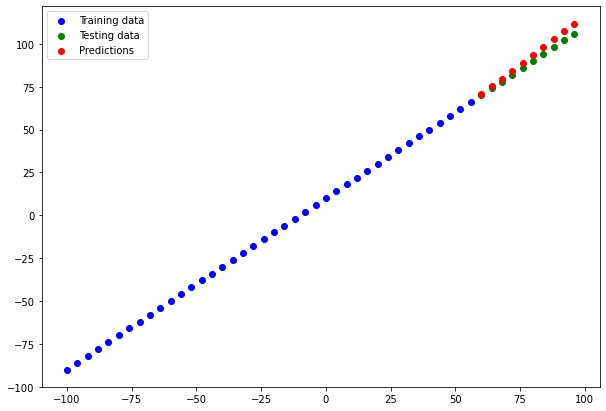

In [48]:

plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)